In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# LIBRARIES:

In [ ]:
import numpy as np
import pandas as pd

from PIL import Image
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-whitegrid')

# PATHS:

In [ ]:
data_path = 'gdrive/My Drive/1_PROJECTS/2_APPAREL_RECOMMENDATION/DATA/'
img_path = data_path + '16k_images/'

# PLOTTING FUNCTION:

In [ ]:
def fn_show_imgs(query_idx, listO_imgs_image, listO_imgs_bow, listO_imgs_tfidf):

    print()
    print('QUERY:')
    query_img  = df.img.values[query_idx]
    display(Image.open(img_path + query_img).resize((170, 170)))
    print()

    listO_valid_imgs = []
    l1, l2, l3 = listO_imgs_image, listO_imgs_bow, listO_imgs_tfidf

    for l in [l1, l2, l3]:
        n = 1
        for img in l:
            try:
                Image.open(img_path + img).resize((150, 150))
                listO_valid_imgs.append(img)
                n+=1
                if n > 6:
                    break
            except:
                pass

    imgs = [Image.open(img_path + img) for img in listO_valid_imgs]
    fig, axes = plt.subplots(3, 6, figsize=(15, 7))
    axes = axes.ravel()

    for idx, img in enumerate(imgs):
        if idx == 0:  axes[idx].set(title = 'IMAGE BASED RECOMMENDATIONS:')
        if idx == 6:  axes[idx].set(title = 'BOW BASED RECOMMENDATIONS:')
        if idx == 12: axes[idx].set(title = 'TFIDF BASED RECOMMENDATIONS:')
        axes[idx].imshow(img, aspect='auto')

    plt.tight_layout()

# SIMILARITY FUNCTIONS:

In [ ]:
def fn_similar_vecs(query_idx, df_imgs, matrixO_vecs, buffer = 1000, n_recommendations = 6):

    query_img  = df_imgs.img.values[query_idx]

    listO_losses = []
    for idx in range(len(matrixO_vecs)):

        loss = (((matrixO_vecs[query_idx] - matrixO_vecs[idx])**2).sum())**(1/2) #-----EUCLEDIAN DIST
        listO_losses.append(loss)

    arryO_losses = np.array(listO_losses)

    best_idxs = np.argsort(arryO_losses)[1:n_recommendations+buffer]

    listO_most_simi_imgs = df_imgs.iloc[best_idxs].img.values

    return listO_most_simi_imgs

# DATA:

In [ ]:
df_full = pd.read_csv(data_path + 'df_text_vectorize.csv')
df_full.head()

,img,text
0,B016I2TS4W.jpeg,women superheroes for ironman round neck sleev...
1,B01N49AI08.jpeg,fig womens izo clothing shirt tunic
2,B01JDPCOHO.jpeg,fig top womens clothing won shirt
3,B01N19U5H5.jpeg,sailor women girl top collar harajuku focal18 ...
4,B004GSI2OS.jpeg,stone onyx black featherlite twill resistant s...


In [ ]:
dim_reduced_img_matrix = np.load(data_path + 'arryO_encoded_images.npy')
dim_reduced_bow_matrix = np.load(data_path + 'dim_reduced_bow_matrix.npy')
dim_reduced_tfidf_matrix = np.load(data_path + 'dim_reduced_tfidf_matrix.npy')
arryO_valid_idxs = np.load(data_path + 'arryO_valid_idxs.npy')

# IMAGE & TEXT VECTORS:

# COMPARE RECOMMENDATIONS:


QUERY:


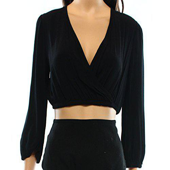

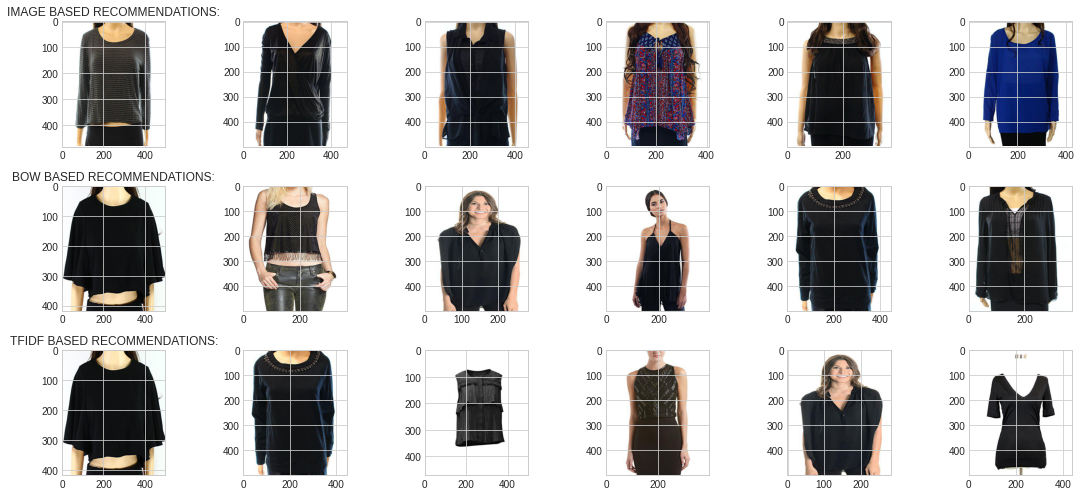

In [ ]:
query_idx = 227
df = df_full.iloc[arryO_valid_idxs]
listO_imgs_image = fn_similar_vecs(query_idx, df, dim_reduced_img_matrix)
listO_imgs_bow = fn_similar_vecs(query_idx, df, dim_reduced_bow_matrix[arryO_valid_idxs])
listO_imgs_tfidf = fn_similar_vecs(query_idx, df, dim_reduced_tfidf_matrix[arryO_valid_idxs])

fn_show_imgs(query_idx, listO_imgs_image, listO_imgs_bow, listO_imgs_tfidf)


QUERY:


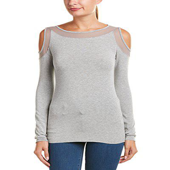

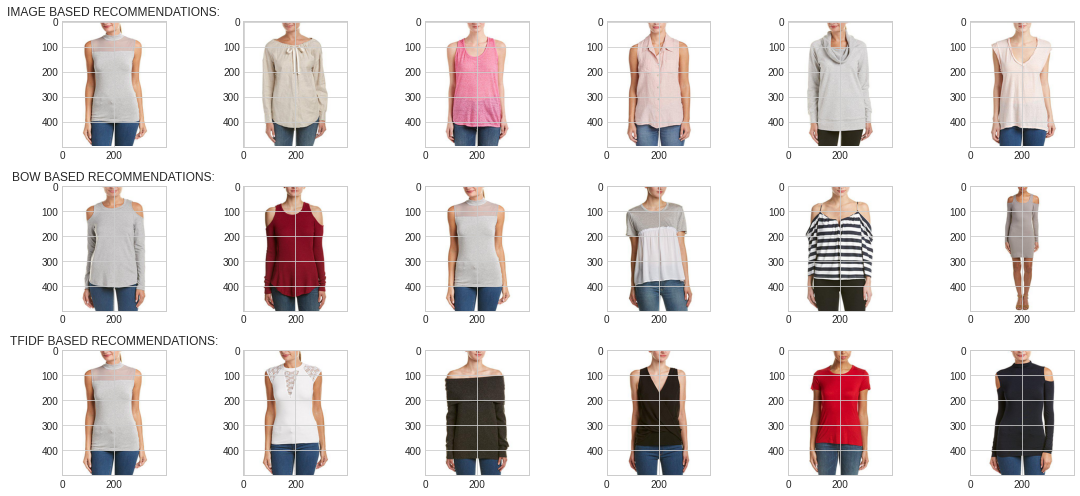

In [ ]:
query_idx = 54
df = df_full.iloc[arryO_valid_idxs]
listO_imgs_image = fn_similar_vecs(query_idx, df, dim_reduced_img_matrix)
listO_imgs_bow = fn_similar_vecs(query_idx, df, dim_reduced_bow_matrix[arryO_valid_idxs])
listO_imgs_tfidf = fn_similar_vecs(query_idx, df, dim_reduced_tfidf_matrix[arryO_valid_idxs])

fn_show_imgs(query_idx, listO_imgs_image, listO_imgs_bow, listO_imgs_tfidf)


QUERY:


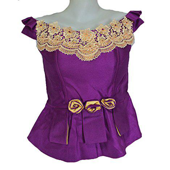

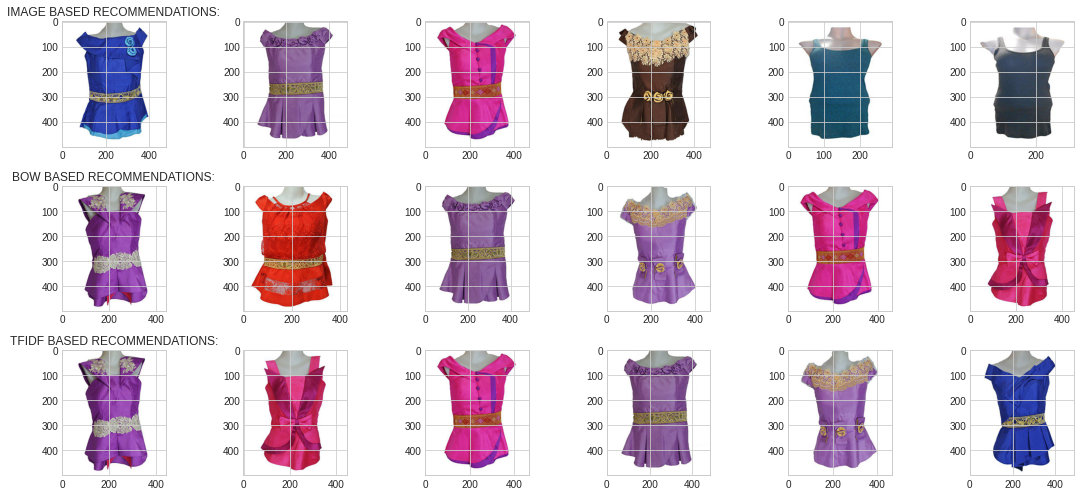

In [ ]:
query_idx = 28
df = df_full.iloc[arryO_valid_idxs]
listO_imgs_image = fn_similar_vecs(query_idx, df, dim_reduced_img_matrix)
listO_imgs_bow = fn_similar_vecs(query_idx, df, dim_reduced_bow_matrix[arryO_valid_idxs])
listO_imgs_tfidf = fn_similar_vecs(query_idx, df, dim_reduced_tfidf_matrix[arryO_valid_idxs])

fn_show_imgs(query_idx, listO_imgs_image, listO_imgs_bow, listO_imgs_tfidf)


QUERY:


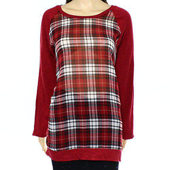

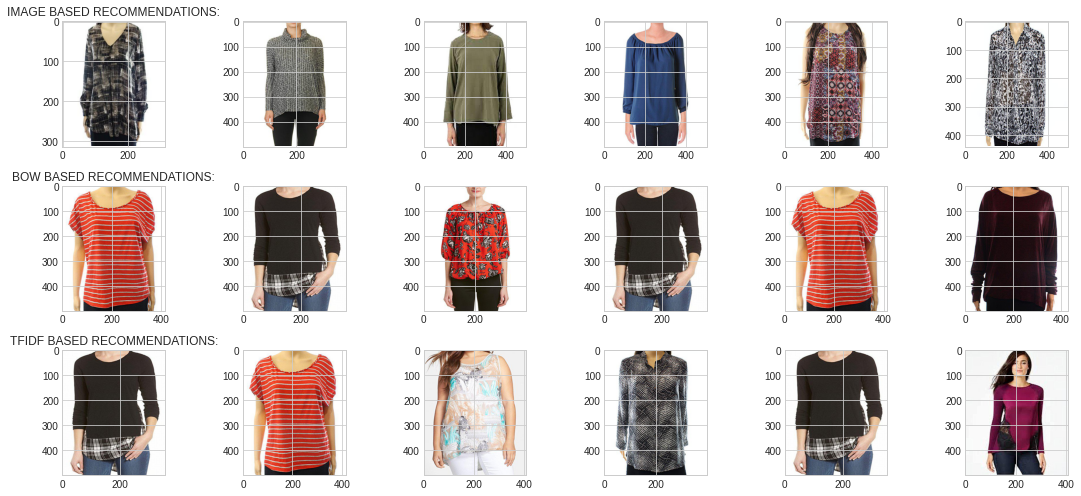

In [ ]:
query_idx = 557
df = df_full.iloc[arryO_valid_idxs]
listO_imgs_image = fn_similar_vecs(query_idx, df, dim_reduced_img_matrix)
listO_imgs_bow = fn_similar_vecs(query_idx, df, dim_reduced_bow_matrix[arryO_valid_idxs])
listO_imgs_tfidf = fn_similar_vecs(query_idx, df, dim_reduced_tfidf_matrix[arryO_valid_idxs])

fn_show_imgs(query_idx, listO_imgs_image, listO_imgs_bow, listO_imgs_tfidf)


QUERY:


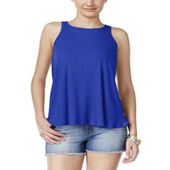

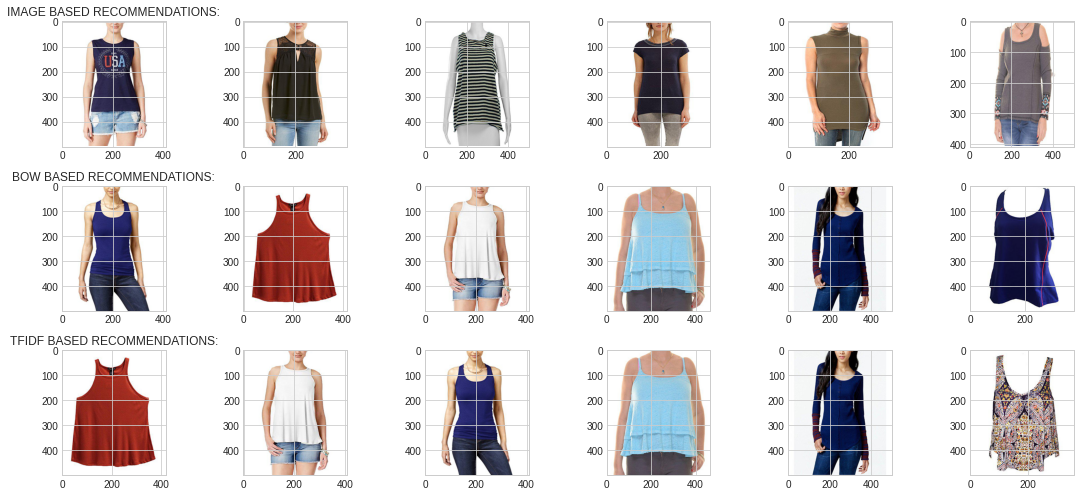

In [ ]:
query_idx = 477
df = df_full.iloc[arryO_valid_idxs]
listO_imgs_image = fn_similar_vecs(query_idx, df, dim_reduced_img_matrix)
listO_imgs_bow = fn_similar_vecs(query_idx, df, dim_reduced_bow_matrix[arryO_valid_idxs])
listO_imgs_tfidf = fn_similar_vecs(query_idx, df, dim_reduced_tfidf_matrix[arryO_valid_idxs])

fn_show_imgs(query_idx, listO_imgs_image, listO_imgs_bow, listO_imgs_tfidf)


QUERY:


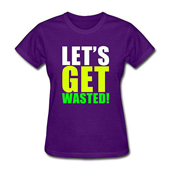

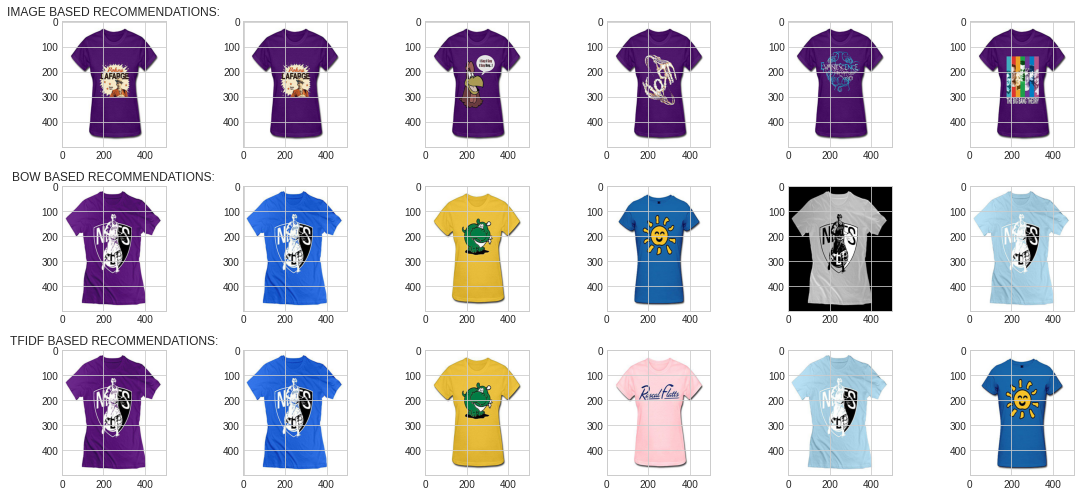

In [ ]:
query_idx = 10222
df = df_full.iloc[arryO_valid_idxs]
listO_imgs_image = fn_similar_vecs(query_idx, df, dim_reduced_img_matrix)
listO_imgs_bow = fn_similar_vecs(query_idx, df, dim_reduced_bow_matrix[arryO_valid_idxs])
listO_imgs_tfidf = fn_similar_vecs(query_idx, df, dim_reduced_tfidf_matrix[arryO_valid_idxs])

fn_show_imgs(query_idx, listO_imgs_image, listO_imgs_bow, listO_imgs_tfidf)